<a href="https://colab.research.google.com/github/ptrzky/Machine-Learning/blob/main/Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Putri Rezky Ameilya B  | H071201078

# **1. Kernel PCA**

Regresi ridge kernel (KRR) menggabungkan regresi dan klasifikasi Ridge (kuadrat terkecil linier dengan regularisasi l2-norma) dengan trik kernel. Dengan demikian mempelajari fungsi linier dalam ruang yang diinduksi oleh masing-masing kernel dan data. Untuk kernel non-linear, ini sesuai dengan fungsi non-linear di ruang asli.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

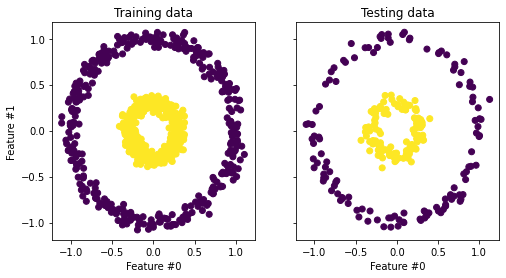

In [ ]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

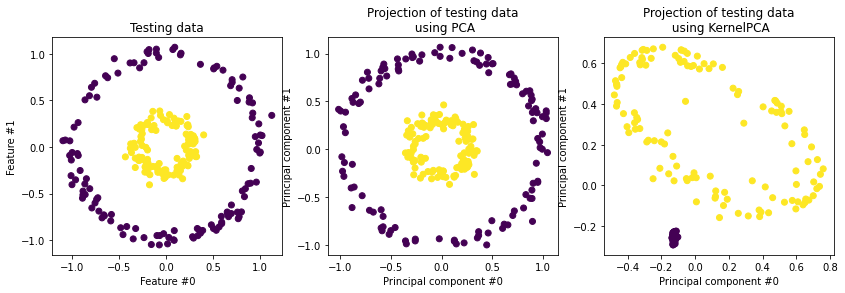

In [ ]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

**Projecting into the original feature space**

In [ ]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

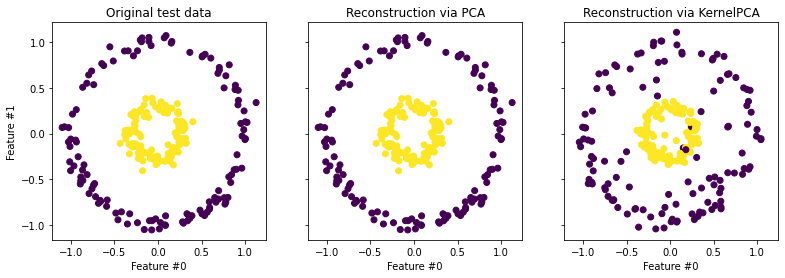

In [ ]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

# **2. Comparison of kernel ridge regression and SVR**

In [ ]:
import numpy as np

rng = np.random.RandomState(42)

X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

train_size = 100

svr = GridSearchCV(
    SVR(kernel="rbf", gamma=0.1),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
)

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

In [ ]:
import time

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s" % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s" % (X_plot.shape[0], kr_predict))

Best SVR with params: {'C': 1.0, 'gamma': 0.1} and R2 score: 0.737
SVR complexity and bandwidth selected and model fitted in 1.471 s
Best KRR with params: {'alpha': 0.1, 'gamma': 0.1} and R2 score: 0.723
KRR complexity and bandwidth selected and model fitted in 0.843 s
Support vector ratio: 0.340
SVR prediction for 100000 inputs in 0.457 s
KRR prediction for 100000 inputs in 0.797 s


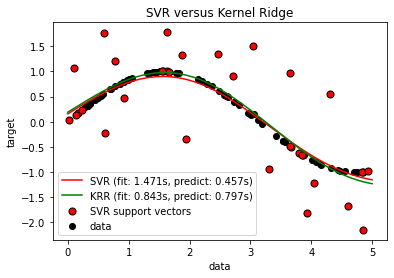

In [ ]:
import matplotlib.pyplot as plt

sv_ind = svr.best_estimator_.support_
plt.scatter(
    X[sv_ind],
    y[sv_ind],
    c="r",
    s=50,
    label="SVR support vectors",
    zorder=2,
    edgecolors=(0, 0, 0),
)
plt.scatter(X[:100], y[:100], c="k", label="data", zorder=1, edgecolors=(0, 0, 0))
plt.plot(
    X_plot,
    y_svr,
    c="r",
    label="SVR (fit: %.3fs, predict: %.3fs)" % (svr_fit, svr_predict),
)
plt.plot(
    X_plot, y_kr, c="g", label="KRR (fit: %.3fs, predict: %.3fs)" % (kr_fit, kr_predict)
)
plt.xlabel("data")
plt.ylabel("target")
plt.title("SVR versus Kernel Ridge")
_ = plt.legend()

**Visualisasikan waktu pelatihan dan prediksi**

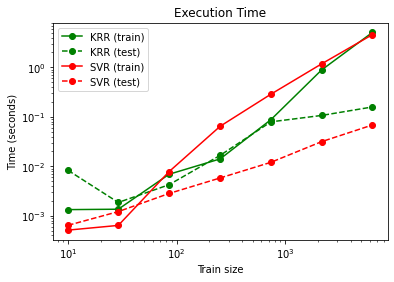

In [ ]:
plt.figure()

sizes = np.logspace(1, 3.8, 7).astype(int)
for name, estimator in {
    "KRR": KernelRidge(kernel="rbf", alpha=0.01, gamma=10),
    "SVR": SVR(kernel="rbf", C=1e2, gamma=10),
}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(
        sizes,
        train_time,
        "o-",
        color="r" if name == "SVR" else "g",
        label="%s (train)" % name,
    )
    plt.plot(
        sizes,
        test_time,
        "o--",
        color="r" if name == "SVR" else "g",
        label="%s (test)" % name,
    )

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title("Execution Time")
_ = plt.legend(loc="best")

**Visualize the learning curves**

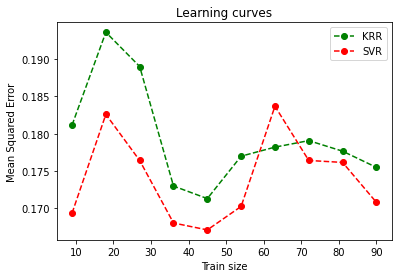

In [ ]:
from sklearn.model_selection import learning_curve

plt.figure()

svr = SVR(kernel="rbf", C=1e1, gamma=0.1)
kr = KernelRidge(kernel="rbf", alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(
    svr,
    X[:100],
    y[:100],
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=10,
)
train_sizes_abs, train_scores_kr, test_scores_kr = learning_curve(
    kr,
    X[:100],
    y[:100],
    train_sizes=np.linspace(0.1, 1, 10),
    scoring="neg_mean_squared_error",
    cv=10,
)

plt.plot(train_sizes, -test_scores_kr.mean(1), "o--", color="g", label="KRR")
plt.plot(train_sizes, -test_scores_svr.mean(1), "o--", color="r", label="SVR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()